In [1]:
#!pip install cdtw

In [2]:
import pandas as pd
import numpy as np
from numpy import savetxt, loadtxt
#from fastdtw import fastdtw
from dtaidistance import dtw
import scipy.spatial.distance as sd
from scipy.spatial.distance import euclidean, squareform
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt



from fastcluster import linkage

from datetime import datetime

from cdtw import pydtw

%matplotlib inline


# https://docs.coinmetrics.io/api/v4

import coinmetrics
from scipy import stats


In [3]:
#len(supported_assets)

In [4]:
prices_df_orig = pd.read_csv('./streamlit/coin_data/lunar_unsup_prices_50.csv', index_col=False)
prices_df_z = pd.read_csv('./streamlit/coin_data/lunar_unsup_prices_z_50.csv', index_col=False)

#prices_df_z['date'] = prices_df_z['time'].str[:10]

prices_df_orig['time'] = pd.to_datetime(prices_df_orig['time'])
prices_df_orig = prices_df_orig.set_index('time')

prices_df_z['time'] = pd.to_datetime(prices_df_z['time'])
prices_df_z = prices_df_z.set_index('time')

prices_df_z

,ADA-Cardano,ATOM-Cosmos,BAT-Basic Attention Token,BCD-Bitcoin Diamond,BCH-Bitcoin Cash,BNB-Binance Coin,BSV-Bitcoin SV,BTC-Bitcoin,BTG-Bitcoin Gold,BTT-BitTorrent,...,SIL-Sister In Law,SPE-SavePlanetEarth,SRX-StorX Token,STACK2-StackOS,UFO2-The Truth,VPP-Virtue Poker,WAIV-Waiv,WEYU-WEYU,WOOF-Shibance Token,ZENC-Zenccoin
time,,,,,,,,,,,,,,,,,,,,,
2019-09-25,-0.682868,-0.867196,-0.763299,-0.603451,-0.736364,-0.640305,-1.591539,-0.804713,-0.583833,-0.474735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-26,-0.684213,-0.877807,-0.790771,-0.677764,-0.797760,-0.645266,-1.644693,-0.826891,-0.589445,-0.489073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27,-0.682724,-0.869998,-0.743200,-0.635144,-0.771423,-0.642585,-1.623089,-0.820606,-0.588217,-0.485728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-28,-0.683146,-0.870142,-0.753507,-0.645852,-0.739701,-0.642299,-1.622081,-0.818474,-0.585650,-0.482860,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-29,-0.685193,-0.881016,-0.770767,-0.688310,-0.781189,-0.645268,-1.656551,-0.827682,-0.599463,-0.491463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,2.784102,2.614350,1.229424,1.152974,1.205238,1.695164,-0.447151,1.355093,1.545102,1.275121,...,1.286475,-0.422121,1.389849,-1.761945,-0.829180,0.430398,-1.243069,-0.570842,-1.001474,0.737034
2021-09-10,2.600751,2.991723,1.082902,1.011615,1.064551,1.585792,-0.517032,1.272118,1.424068,1.165839,...,1.205009,-1.302170,1.027677,-0.568971,-1.165651,-0.350480,-1.344945,-1.131891,-1.472715,0.765938
2021-09-11,2.958273,2.687460,1.114224,1.033970,1.098040,1.604340,-0.472490,1.291878,1.421768,1.182917,...,1.087712,-1.362123,1.171771,-0.679433,-1.271517,-0.198654,-1.482033,-0.748974,-1.489082,0.702807


In [5]:
prices_df_orig

,ADA-Cardano,ATOM-Cosmos,BAT-Basic Attention Token,BCD-Bitcoin Diamond,BCH-Bitcoin Cash,BNB-Binance Coin,BSV-Bitcoin SV,BTC-Bitcoin,BTG-Bitcoin Gold,BTT-BitTorrent,...,SIL-Sister In Law,SPE-SavePlanetEarth,SRX-StorX Token,STACK2-StackOS,UFO2-The Truth,VPP-Virtue Poker,WAIV-Waiv,WEYU-WEYU,WOOF-Shibance Token,ZENC-Zenccoin
time,,,,,,,,,,,,,,,,,,,,,
2019-09-25,0.039054,2.299140,0.161281,0.477745,228.211684,16.102139,86.676224,8464.917221,7.770585,0.000459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-26,0.038091,2.224171,0.152301,0.401846,214.492623,15.240224,83.459686,8075.227289,7.606122,0.000429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27,0.039157,2.279343,0.167851,0.445376,220.377650,15.705934,84.767013,8185.655469,7.642106,0.000436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-28,0.038855,2.278325,0.164482,0.434439,227.466114,15.755632,84.828018,8223.120452,7.717349,0.000442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-29,0.037390,2.201502,0.158840,0.391076,218.195478,15.239825,82.742076,8061.324161,7.312555,0.000424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,2.520531,26.895262,0.812672,2.271634,662.070099,421.882592,155.927984,46415.265094,70.158289,0.004120,...,152.174823,3.649990e-08,3.819998,0.021284,0.000003,0.598414,0.000890,0.034044,0.012179,0.009995
2021-09-10,2.389298,29.561298,0.764776,2.127259,630.632990,402.879667,151.699189,44957.294816,66.611428,0.003892,...,150.794554,3.163438e-08,3.591870,0.025927,0.000002,0.539502,0.000787,0.025910,0.008653,0.010042
2021-09-11,2.645193,27.411769,0.775015,2.150092,638.116172,406.102287,154.394610,45304.506965,66.544032,0.003927,...,148.807197,3.130292e-08,3.682633,0.025497,0.000002,0.550957,0.000648,0.031462,0.008531,0.009939


In [6]:
prices_df_z.isnull().sum()

ADA-Cardano                    0
ATOM-Cosmos                    0
BAT-Basic Attention Token      0
BCD-Bitcoin Diamond            0
BCH-Bitcoin Cash               0
                            ... 
VPP-Virtue Poker             693
WAIV-Waiv                    676
WEYU-WEYU                    707
WOOF-Shibance Token          679
ZENC-Zenccoin                703
Length: 1112, dtype: int64

In [7]:
prices_df_z = prices_df_z.dropna(axis='columns')
prices_df_z

,ADA-Cardano,ATOM-Cosmos,BAT-Basic Attention Token,BCD-Bitcoin Diamond,BCH-Bitcoin Cash,BNB-Binance Coin,BSV-Bitcoin SV,BTC-Bitcoin,BTG-Bitcoin Gold,BTT-BitTorrent,...,IDT-InvestDigital,LPT-livepeer,OTB-OTCBTC Token,TOS-ThingsOperatingSystem,MEX-MEX,WIN-WINk,ALGO-Algorand,BF-Bitforex Token,BGG-Bgogo Token,OKB-OKEx Utility Token
time,,,,,,,,,,,,,,,,,,,,,
2019-09-25,-0.682868,-0.867196,-0.763299,-0.603451,-0.736364,-0.640305,-1.591539,-0.804713,-0.583833,-0.474735,...,2.180220,-0.386625,0.522909,1.066804,2.141732,-0.019123,-0.838683,1.967112,4.252853,-0.918464
2019-09-26,-0.684213,-0.877807,-0.790771,-0.677764,-0.797760,-0.645266,-1.644693,-0.826891,-0.589445,-0.489073,...,1.806024,-0.397953,0.255459,1.019713,1.896406,-0.270138,-0.859813,1.224815,4.005491,-0.925023
2019-09-27,-0.682724,-0.869998,-0.743200,-0.635144,-0.771423,-0.642585,-1.623089,-0.820606,-0.588217,-0.485728,...,1.940748,-0.401399,0.449883,1.045695,2.063946,-0.267185,-0.860678,2.037055,3.842338,-0.917549
2019-09-28,-0.683146,-0.870142,-0.753507,-0.645852,-0.739701,-0.642299,-1.622081,-0.818474,-0.585650,-0.482860,...,1.778684,-0.399640,0.484890,1.428918,1.998127,-0.152013,-0.826762,1.329890,4.100226,-0.917985
2019-09-29,-0.685193,-0.881016,-0.770767,-0.688310,-0.781189,-0.645268,-1.656551,-0.827682,-0.599463,-0.491463,...,1.635395,-0.436214,0.253012,1.104153,1.692965,-0.273091,-0.778566,1.288956,3.963387,-0.927314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,2.784102,2.614350,1.229424,1.152974,1.205238,1.695164,-0.447151,1.355093,1.545102,1.275121,...,-0.502129,1.160015,1.485974,0.499242,1.216329,0.820990,4.089989,-0.592731,0.295368,1.437967
2021-09-10,2.600751,2.991723,1.082902,1.011615,1.064551,1.585792,-0.517032,1.272118,1.424068,1.165839,...,-0.566549,1.007601,1.816471,0.496597,1.104836,0.717615,3.456722,-0.641917,0.224746,1.356265
2021-09-11,2.958273,2.687460,1.114224,1.033970,1.098040,1.604340,-0.472490,1.291878,1.421768,1.182917,...,-0.559802,1.034199,0.993270,0.704583,1.136104,0.761327,3.426213,-0.621045,0.303160,1.381215


In [8]:
# https://stackoverflow.com/questions/34501868/calculating-dynamic-time-warping-distance-in-a-pandas-data-frame
# distance, path = fastdtw(prices_df['btc'], prices_df['eth'], dist=euclidean)
# distance, path


In [9]:
# https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html

# def dtw(a, b):
#     distance, path = fastdtw(a, b, dist=euclidean)
#     return distance



In [10]:
# vf = np.vectorize(dtw, signature='(n),(n)->()')
# result = vf(prices_df.T.values, prices_df.T.values[:, None])
# result
# df = pd.DataFrame(result, index=prices_df.columns, columns=prices_df.columns)
# df
print(datetime.now())
#df = squareform(sd.pdist(prices_df_z.T, lambda u, v: fastdtw(u, v, dist=euclidean)[0])) #~ 10-20  mins
df = squareform(sd.pdist(prices_df_z.T, lambda u, v: pydtw.dtw(u,v,pydtw.Settings(step = 'p0sym', window = 'palival', param = 2.0, norm = False, compute_path = True)).get_dist() )) #~ 10-20  mins

#df.to_csv('lunar_unsup_prices_z_dist_matrix.csv', index=True)
print(datetime.now())

2021-09-27 00:16:56.104469
2021-09-27 00:18:16.178368


In [11]:
df

array([[   0.        ,  391.01320045,  416.22991214, ..., 1492.97629582,
        1201.63266622,  385.64772893],
       [ 391.01320045,    0.        ,  273.79955662, ..., 1510.05378187,
        1136.03015222,  372.29858911],
       [ 416.22991214,  273.79955662,    0.        , ..., 1428.75795373,
        1152.51981363,  367.55809798],
       ...,
       [1492.97629582, 1510.05378187, 1428.75795373, ...,    0.        ,
         903.05462905, 1473.77078442],
       [1201.63266622, 1136.03015222, 1152.51981363, ...,  903.05462905,
           0.        , 1203.04996093],
       [ 385.64772893,  372.29858911,  367.55809798, ..., 1473.77078442,
        1203.04996093,    0.        ]])

In [12]:
df_dist = pd.DataFrame(df, columns=prices_df_z.columns, index = prices_df_z.columns)
df_dist.to_csv('streamlit/coin_data/lunar_dist_matrix.csv', index=True)

In [13]:
df_dist

,ADA-Cardano,ATOM-Cosmos,BAT-Basic Attention Token,BCD-Bitcoin Diamond,BCH-Bitcoin Cash,BNB-Binance Coin,BSV-Bitcoin SV,BTC-Bitcoin,BTG-Bitcoin Gold,BTT-BitTorrent,...,IDT-InvestDigital,LPT-livepeer,OTB-OTCBTC Token,TOS-ThingsOperatingSystem,MEX-MEX,WIN-WINk,ALGO-Algorand,BF-Bitforex Token,BGG-Bgogo Token,OKB-OKEx Utility Token
ADA-Cardano,0.000000,391.013200,416.229912,374.091315,459.127777,219.104815,1272.594511,499.226176,379.145613,460.588146,...,1155.051768,408.429715,542.806352,897.272915,869.023874,600.288355,372.649879,1492.976296,1201.632666,385.647729
ATOM-Cosmos,391.013200,0.000000,273.799557,519.089466,365.874367,345.725557,1107.930460,275.106679,426.110138,426.268105,...,1035.150260,437.565157,561.368096,931.714821,848.032954,505.464443,141.068637,1510.053782,1136.030152,372.298589
BAT-Basic Attention Token,416.229912,273.799557,0.000000,366.048021,327.278435,271.308317,1081.531763,414.455094,239.195433,202.684733,...,866.245231,257.960189,654.120568,762.474112,688.967847,301.792675,270.957622,1428.757954,1152.519814,367.558098
BCD-Bitcoin Diamond,374.091315,519.089466,366.048021,0.000000,372.396433,306.831504,1061.402572,642.203681,200.056084,313.648569,...,971.710278,289.926305,707.203068,720.230904,740.217771,395.461578,469.273910,1339.363963,1126.414995,357.554951
BCH-Bitcoin Cash,459.127777,365.874367,327.278435,372.396433,0.000000,352.100707,952.337968,407.873602,317.611797,388.813116,...,989.434530,454.117639,621.360354,804.011975,743.831265,454.860055,364.970309,1351.337469,1123.866510,371.178633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WIN-WINk,600.288355,505.464443,301.792675,395.461578,454.860055,395.864131,1054.908529,680.662900,238.830628,146.695588,...,622.059559,327.746964,763.159140,697.452941,620.070911,0.000000,548.400215,1225.377722,996.989797,464.310668
ALGO-Algorand,372.649879,141.068637,270.957622,469.273910,364.970309,357.752883,1126.033922,279.352609,429.811792,437.367913,...,1068.377219,427.007544,552.480748,903.178584,854.845141,548.400215,0.000000,1524.466930,1192.889980,403.167711
BF-Bitforex Token,1492.976296,1510.053782,1428.757954,1339.363963,1351.337469,1438.264617,1326.492699,1641.730371,1337.785052,1331.098339,...,846.632133,1379.413009,1201.649341,1003.025399,929.355668,1225.377722,1524.466930,0.000000,903.054629,1473.770784
BGG-Bgogo Token,1201.632666,1136.030152,1152.519814,1126.414995,1123.866510,1192.859975,1543.577419,1221.924706,1132.767383,1098.271631,...,851.159138,1133.875159,861.000893,1054.010305,911.345003,996.989797,1192.889980,903.054629,0.000000,1203.049961


In [14]:
prices_df_z

,ADA-Cardano,ATOM-Cosmos,BAT-Basic Attention Token,BCD-Bitcoin Diamond,BCH-Bitcoin Cash,BNB-Binance Coin,BSV-Bitcoin SV,BTC-Bitcoin,BTG-Bitcoin Gold,BTT-BitTorrent,...,IDT-InvestDigital,LPT-livepeer,OTB-OTCBTC Token,TOS-ThingsOperatingSystem,MEX-MEX,WIN-WINk,ALGO-Algorand,BF-Bitforex Token,BGG-Bgogo Token,OKB-OKEx Utility Token
time,,,,,,,,,,,,,,,,,,,,,
2019-09-25,-0.682868,-0.867196,-0.763299,-0.603451,-0.736364,-0.640305,-1.591539,-0.804713,-0.583833,-0.474735,...,2.180220,-0.386625,0.522909,1.066804,2.141732,-0.019123,-0.838683,1.967112,4.252853,-0.918464
2019-09-26,-0.684213,-0.877807,-0.790771,-0.677764,-0.797760,-0.645266,-1.644693,-0.826891,-0.589445,-0.489073,...,1.806024,-0.397953,0.255459,1.019713,1.896406,-0.270138,-0.859813,1.224815,4.005491,-0.925023
2019-09-27,-0.682724,-0.869998,-0.743200,-0.635144,-0.771423,-0.642585,-1.623089,-0.820606,-0.588217,-0.485728,...,1.940748,-0.401399,0.449883,1.045695,2.063946,-0.267185,-0.860678,2.037055,3.842338,-0.917549
2019-09-28,-0.683146,-0.870142,-0.753507,-0.645852,-0.739701,-0.642299,-1.622081,-0.818474,-0.585650,-0.482860,...,1.778684,-0.399640,0.484890,1.428918,1.998127,-0.152013,-0.826762,1.329890,4.100226,-0.917985
2019-09-29,-0.685193,-0.881016,-0.770767,-0.688310,-0.781189,-0.645268,-1.656551,-0.827682,-0.599463,-0.491463,...,1.635395,-0.436214,0.253012,1.104153,1.692965,-0.273091,-0.778566,1.288956,3.963387,-0.927314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,2.784102,2.614350,1.229424,1.152974,1.205238,1.695164,-0.447151,1.355093,1.545102,1.275121,...,-0.502129,1.160015,1.485974,0.499242,1.216329,0.820990,4.089989,-0.592731,0.295368,1.437967
2021-09-10,2.600751,2.991723,1.082902,1.011615,1.064551,1.585792,-0.517032,1.272118,1.424068,1.165839,...,-0.566549,1.007601,1.816471,0.496597,1.104836,0.717615,3.456722,-0.641917,0.224746,1.356265
2021-09-11,2.958273,2.687460,1.114224,1.033970,1.098040,1.604340,-0.472490,1.291878,1.421768,1.182917,...,-0.559802,1.034199,0.993270,0.704583,1.136104,0.761327,3.426213,-0.621045,0.303160,1.381215


In [15]:
#df2 = squareform(sd.pdist(prices_df_z.T, lambda u, v: dtw.distance_fast(u, v)))

In [16]:
squareform(df)

array([ 391.01320045,  416.22991214,  374.09131493, ...,  903.05462905,
       1473.77078442, 1203.04996093])

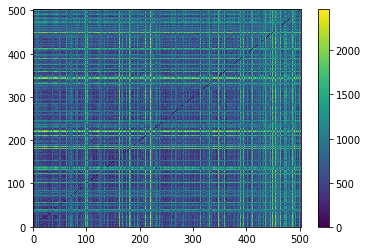

In [17]:
plt.pcolormesh(df_dist)
plt.colorbar()
plt.show()

In [18]:
# https://gmarti.gitlab.io/ml/2017/09/07/how-to-sort-distance-matrix.html
def seriation(Z,N,cur_index):
    '''
        input:
            - Z is a hierarchical tree (dendrogram)
            - N is the number of points given to the clustering process
            - cur_index is the position in the tree for the recursive traversal
        output:
            - order implied by the hierarchical tree Z
            
        seriation computes the order implied by a hierarchical tree (dendrogram)
    '''
    if cur_index < N:
        return [cur_index]
    else:
        left = int(Z[cur_index-N,0])
        right = int(Z[cur_index-N,1])
        return (seriation(Z,N,left) + seriation(Z,N,right))
    
def compute_serial_matrix(dist_mat,method="ward"):
    '''
        input:
            - dist_mat is a distance matrix
            - method = ["ward","single","average","complete"]
        output:
            - seriated_dist is the input dist_mat,
              but with re-ordered rows and columns
              according to the seriation, i.e. the
              order implied by the hierarchical tree
            - res_order is the order implied by
              the hierarhical tree
            - res_linkage is the hierarhical tree (dendrogram)
        
        compute_serial_matrix transforms a distance matrix into 
        a sorted distance matrix according to the order implied 
        by the hierarchical tree (dendrogram)
    '''
    N = len(dist_mat)
    flat_dist_mat = squareform(dist_mat)
    res_linkage = linkage(flat_dist_mat, method=method,preserve_input=True)
    res_order = seriation(res_linkage, N, N + N-2)
    seriated_dist = np.zeros((N,N))
    a,b = np.triu_indices(N,k=1)
    seriated_dist[a,b] = dist_mat[ [res_order[i] for i in a], [res_order[j] for j in b]]
    seriated_dist[b,a] = seriated_dist[a,b]
    
    return seriated_dist, res_order, res_linkage

502
Method:	 ward


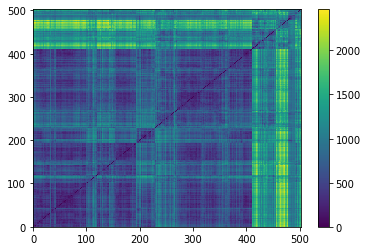

Method:	 single


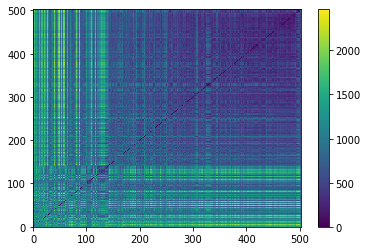

Method:	 average


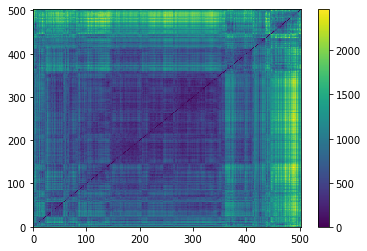

Method:	 complete


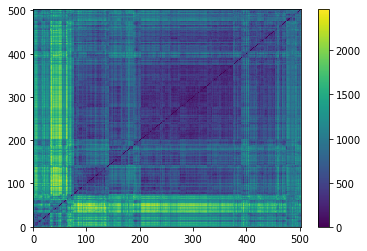

In [19]:
print(len(df))
methods = ["ward","single","average","complete"]
for method in methods:
    print("Method:\t",method)
    
    ordered_dist_mat, res_order, res_linkage = compute_serial_matrix(df,method)
    
    plt.pcolormesh(ordered_dist_mat)
    plt.colorbar()
    plt.xlim([0,len(df)])
    plt.ylim([0,len(df)])
    plt.show()

In [20]:
squareform(df)

array([ 391.01320045,  416.22991214,  374.09131493, ...,  903.05462905,
       1473.77078442, 1203.04996093])

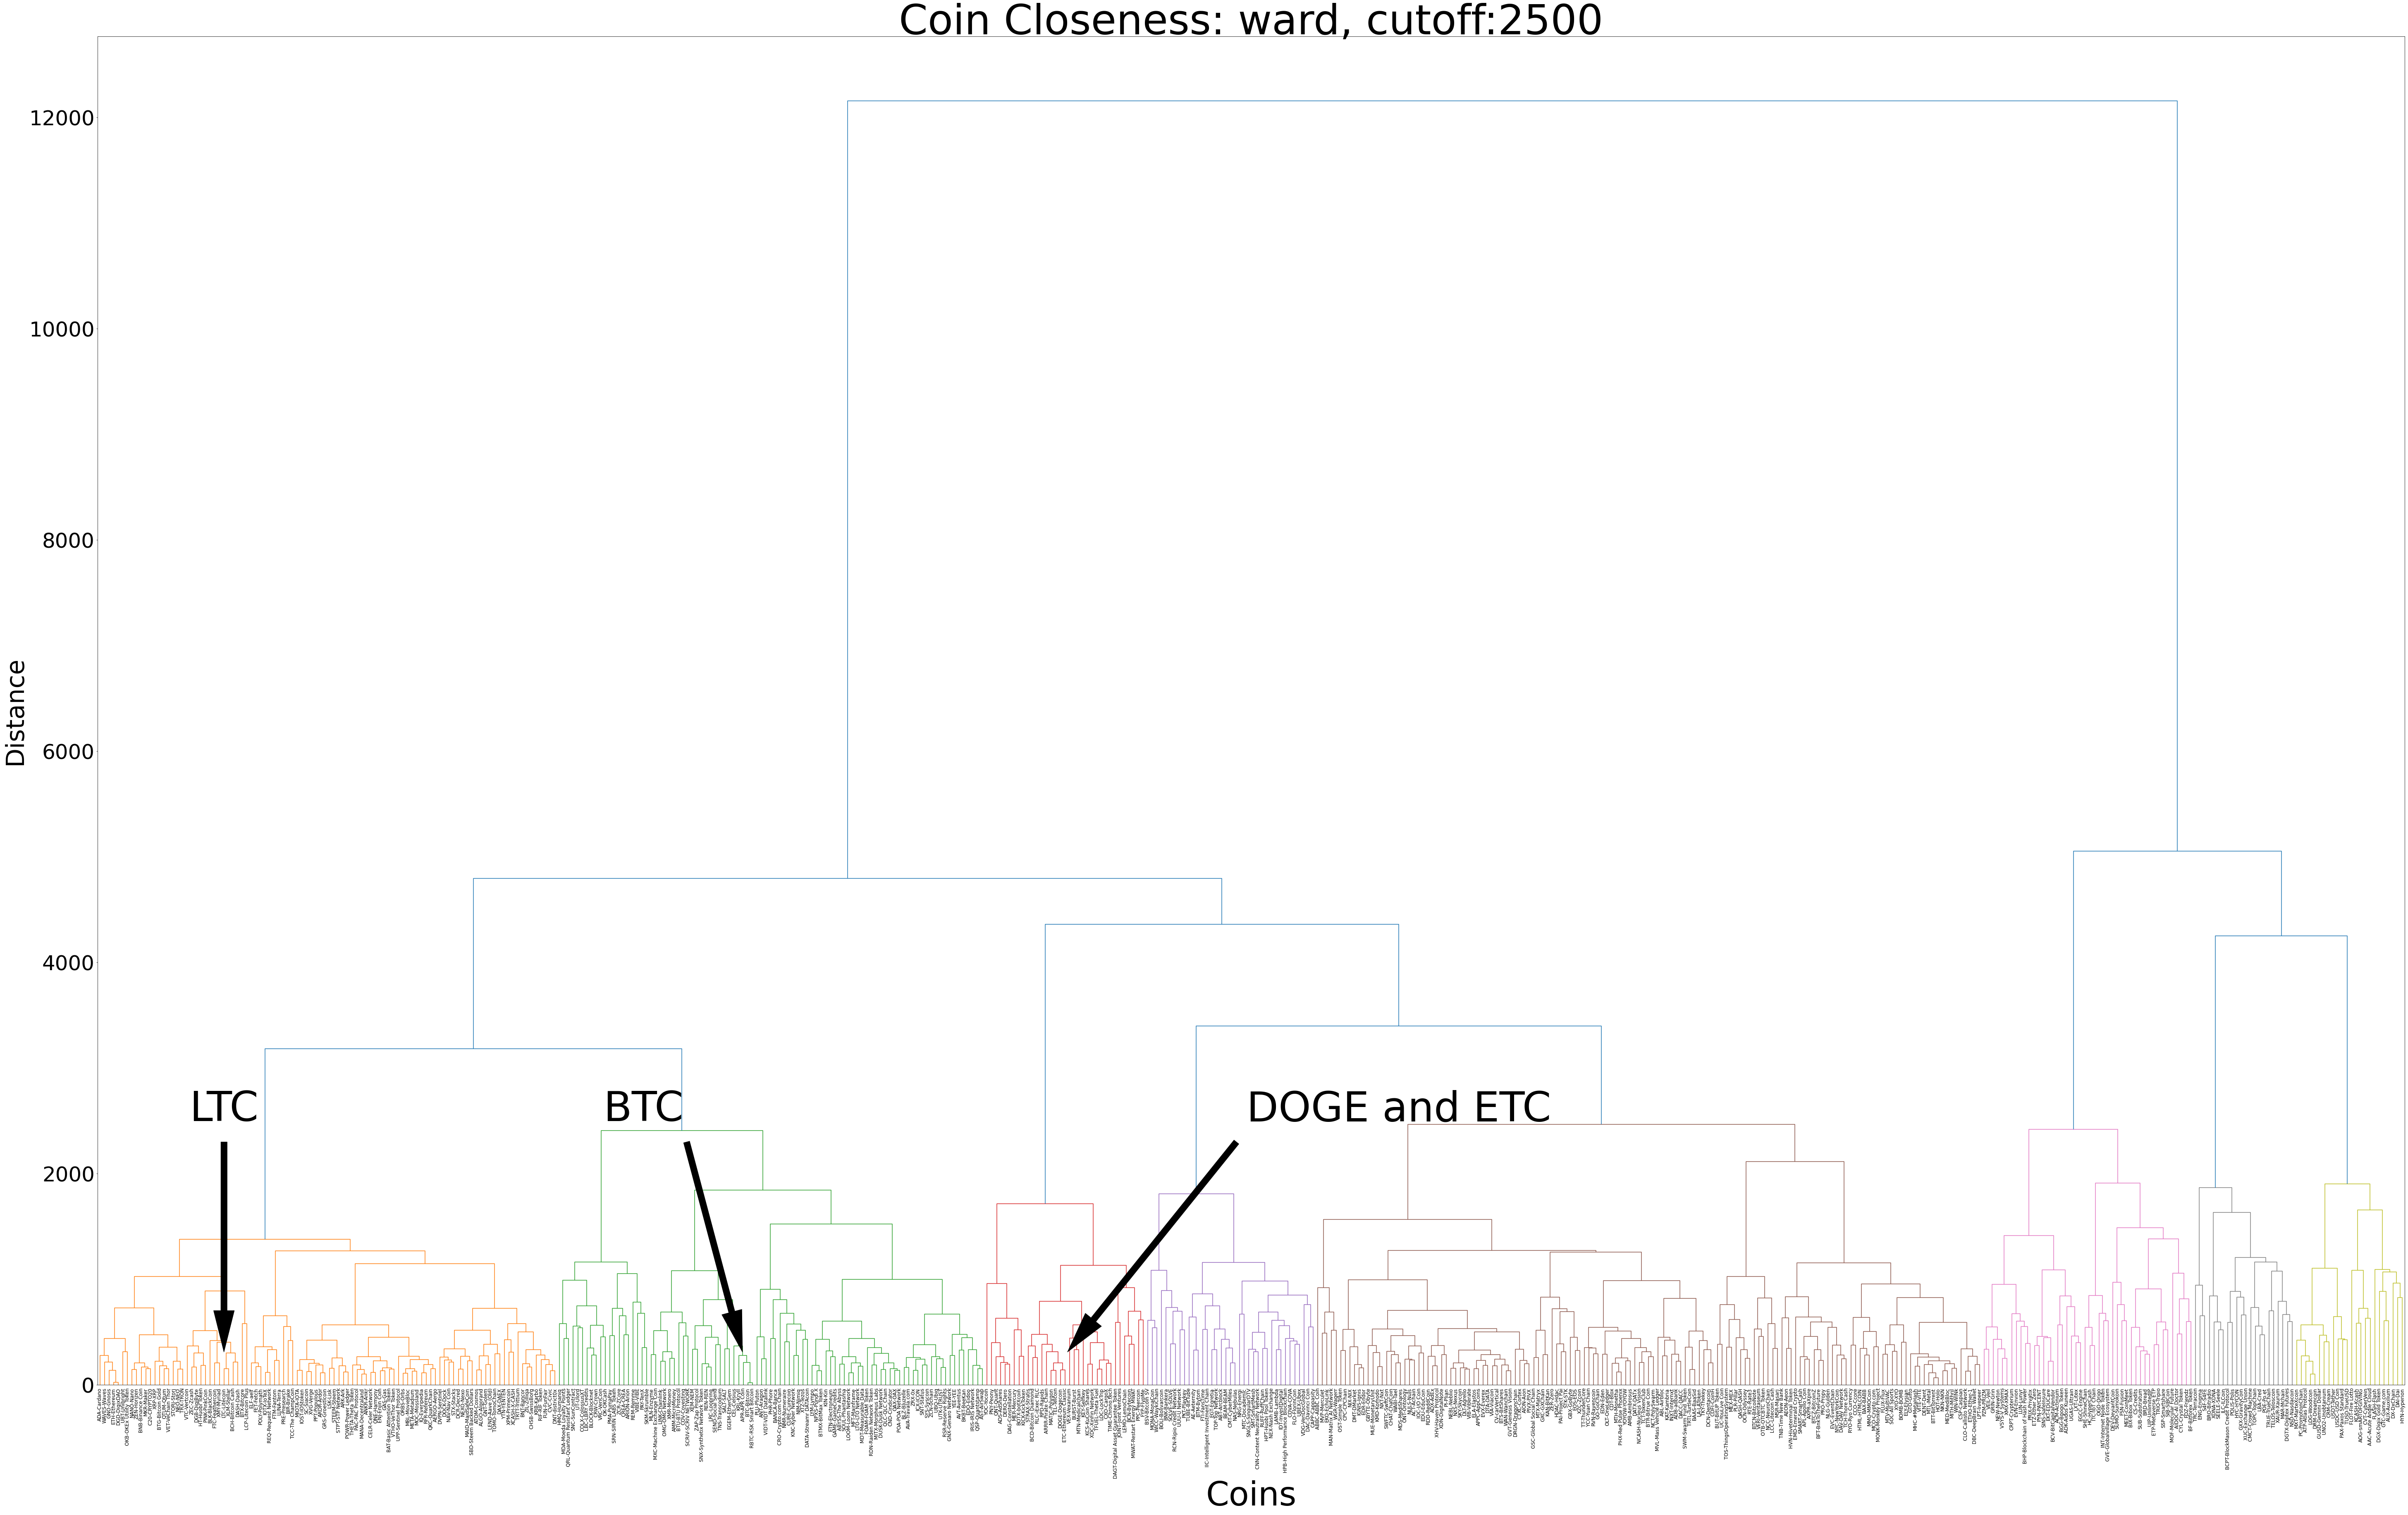

In [21]:
# https://stackoverflow.com/questions/41416498/dendrogram-or-other-plot-from-distance-matrix
plt.rcParams["figure.figsize"] = (100,60)

mat = df_dist
dists = squareform(mat)

methods = [("ward", 2500)]#, ("single", 400),("average", 550),("complete", 1300),("weighted", 1050), ("centroid", 400), ("median", 400)]
for method in methods:
    # https://towardsdatascience.com/how-to-apply-hierarchical-clustering-to-time-series-a5fe2a7d8447

    #savetxt('dendo_linkage.csv', linkage(dists, method[0]), delimiter=',')
    linkage_matrix = loadtxt('./streamlit/coin_data/dendo_linkage.csv', delimiter=',')#linkage(dists, method[0])
    hierarchy.dendrogram(linkage_matrix, labels=df_dist.columns, color_threshold=method[1])
    plt.title("Coin Closeness: " + method[0] + ", cutoff:" + str(method[1]), fontsize=100)
    plt.xlabel('Coins', fontsize=80)
    plt.ylabel('Distance', fontsize=60)
    #plt.tick_params(axis='x', which='major', labelsize=12)
    # plt.tick_params(axis='y', which='major', labelsize=30)
    plt.xticks(fontsize= 12)
    plt.yticks(fontsize=50) # #rotation=90)
    plt.annotate('DOGE and ETC', xy=(2090, 200), xytext=(2500, 2500),
            arrowprops=dict(facecolor='black', shrink=0.05, width=15, headwidth=50, headlength=100), fontsize = 100
            )
    plt.annotate('BTC', xy=(1410, 200), xytext=(1100, 2500),
            arrowprops=dict(facecolor='black', shrink=0.05, width=15, headwidth=50, headlength=100), fontsize = 100
            )

    plt.annotate('LTC', xy=(275, 200), xytext=(200, 2500),
            arrowprops=dict(facecolor='black', shrink=0.05, width=15, headwidth=50, headlength=100), fontsize = 100
            )

    plt.show()

In [22]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))

cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
print(np.unique(cluster_labels))

cluster_labels

[1 2 3 4]
[ 1  2  3  4  5  6  7  8  9 10]


array([ 1,  1,  1,  3,  1,  1,  4,  2,  1,  6,  2,  1,  1,  3,  4,  5,  3,
        1,  6,  1,  3,  2,  1,  1,  1,  1,  1,  1,  2,  2,  5, 10,  1,  5,
        1, 10, 10, 10,  1,  7,  1,  2,  1,  2,  1,  2,  1,  2,  5,  4,  1,
        3,  4,  5, 10,  1,  7,  1,  1,  8,  1,  5,  8,  2,  1,  5,  4,  1,
        6,  4,  4,  1,  4,  5,  3,  2,  1,  1,  2,  4,  1,  3,  1,  4,  7,
        1,  5,  1,  5,  1,  4,  8,  1,  1,  4,  6,  1,  5,  9,  2,  8,  1,
        7,  5,  2,  5,  2,  2,  1,  4,  7,  5,  1,  1,  5,  1,  1,  6,  1,
        5,  2,  3,  1,  9,  6,  5,  4,  1,  4,  2,  6,  6,  7,  3,  8,  1,
        7,  5,  1,  4,  9,  5,  2,  1,  1,  1,  5,  1,  1, 10,  1,  8,  5,
        7,  3,  1,  6,  6,  5,  1,  3,  9,  5,  1,  2,  3,  5,  7,  1,  5,
        1,  1,  7,  2, 10,  7,  5,  2,  6,  4,  9,  9,  8,  1,  2,  9,  2,
        2,  2,  6,  4,  5,  6,  5,  6,  8,  2,  2,  4,  4,  2,  5,  6,  3,
        2,  5,  3,  2,  5,  2,  7,  6,  5,  2,  5,  1,  5,  5,  6,  2,  9,
        3,  7,  4,  2,  1

[(0, 502), (100, 499), (200, 415), (300, 321), (400, 244), (500, 191), (600, 134), (700, 99), (800, 82), (900, 63), (1000, 48), (1100, 37), (1200, 30), (1300, 26), (1400, 24), (1500, 22), (1600, 20), (1700, 18), (1800, 17), (1900, 14), (2000, 12), (2100, 12), (2200, 11), (2300, 11), (2400, 11), (2500, 8), (2600, 8), (2700, 8), (2800, 8), (2900, 8), (3000, 8), (3100, 8), (3200, 7), (3300, 7), (3400, 6), (3500, 6), (3600, 6), (3700, 6), (3800, 6), (3900, 6), (4000, 6), (4100, 6), (4200, 6), (4300, 5), (4400, 4), (4500, 4), (4600, 4), (4700, 4), (4800, 3), (4900, 3), (5000, 3), (5100, 2), (5200, 2), (5300, 2), (5400, 2), (5500, 2), (5600, 2), (5700, 2), (5800, 2), (5900, 2), (6000, 2)]


Text(0, 0.5, '# Clusters')

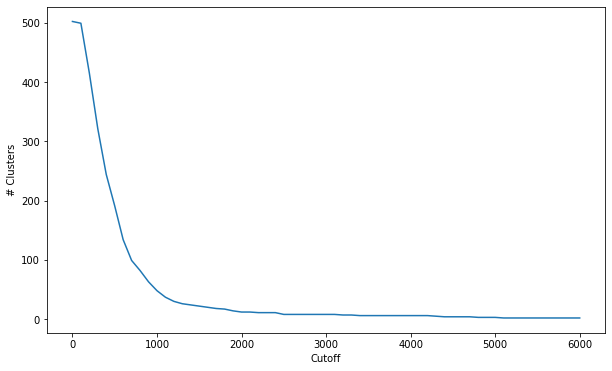

In [23]:
num_clusters = []
x_list = list(range(0, 6001, 100))
for i in x_list:
    num_clusters.append(len(np.unique(fcluster(linkage_matrix, i, criterion='distance'))))

print(list(zip(x_list, num_clusters)))

plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(fontsize= 10)
plt.yticks(fontsize=10) # #rotation=90)
plt.plot(x_list, num_clusters)
plt.xlabel("Cutoff")
plt.ylabel("# Clusters")

In [24]:
cluster_labels = fcluster(linkage_matrix, 2500, criterion='distance')
print(np.unique(cluster_labels))

[1 2 3 4 5 6 7 8]


In [25]:
linkage_matrix

array([[7.00000000e+00, 4.72000000e+02, 1.90487492e+01, 2.00000000e+00],
       [1.70000000e+01, 9.60000000e+01, 2.50059594e+01, 2.00000000e+00],
       [9.00000000e+00, 1.80000000e+01, 6.73636551e+01, 2.00000000e+00],
       ...,
       [9.96000000e+02, 9.99000000e+02, 4.79561151e+03, 4.10000000e+02],
       [9.94000000e+02, 9.98000000e+02, 5.05369357e+03, 9.20000000e+01],
       [1.00000000e+03, 1.00100000e+03, 1.21581542e+04, 5.02000000e+02]])

In [26]:
df_dist['BTC-Bitcoin'].nsmallest(5)

BTC-Bitcoin                 0.000000
RBTC-RSK Smart Bitcoin     19.048749
DNT-district0x            182.464570
APR-APR Coin              183.625792
RIF-RIF Token             198.165249
Name: BTC-Bitcoin, dtype: float64

In [27]:
df_dist['BTC-Bitcoin'].nlargest(5)

POE-Po.et                          2389.612375
DGTX-Digitex Futures               2300.858921
TOPC-TopChain                      2234.428348
BCPT-BlockMason Credit Protocol    2226.952494
TRC-Terracoin                      2168.276187
Name: BTC-Bitcoin, dtype: float64

In [28]:
df_dist['DOGE-Dogecoin'].nsmallest(5)

DOGE-Dogecoin             0.000000
ETC-Ethereum Classic    142.696643
TEL-Telcoin             158.399658
ARRR-Pirate Chain       198.724224
MATIC-Polygon           204.617872
Name: DOGE-Dogecoin, dtype: float64

In [29]:
df_dist['DOGE-Dogecoin'].nlargest(5)

BCPT-BlockMason Credit Protocol    2082.324471
POE-Po.et                          2015.953798
DGTX-Digitex Futures               1956.617868
TRC-Terracoin                      1876.498825
TOPC-TopChain                      1867.479965
Name: DOGE-Dogecoin, dtype: float64

In [30]:
prices_df_z

,ADA-Cardano,ATOM-Cosmos,BAT-Basic Attention Token,BCD-Bitcoin Diamond,BCH-Bitcoin Cash,BNB-Binance Coin,BSV-Bitcoin SV,BTC-Bitcoin,BTG-Bitcoin Gold,BTT-BitTorrent,...,IDT-InvestDigital,LPT-livepeer,OTB-OTCBTC Token,TOS-ThingsOperatingSystem,MEX-MEX,WIN-WINk,ALGO-Algorand,BF-Bitforex Token,BGG-Bgogo Token,OKB-OKEx Utility Token
time,,,,,,,,,,,,,,,,,,,,,
2019-09-25,-0.682868,-0.867196,-0.763299,-0.603451,-0.736364,-0.640305,-1.591539,-0.804713,-0.583833,-0.474735,...,2.180220,-0.386625,0.522909,1.066804,2.141732,-0.019123,-0.838683,1.967112,4.252853,-0.918464
2019-09-26,-0.684213,-0.877807,-0.790771,-0.677764,-0.797760,-0.645266,-1.644693,-0.826891,-0.589445,-0.489073,...,1.806024,-0.397953,0.255459,1.019713,1.896406,-0.270138,-0.859813,1.224815,4.005491,-0.925023
2019-09-27,-0.682724,-0.869998,-0.743200,-0.635144,-0.771423,-0.642585,-1.623089,-0.820606,-0.588217,-0.485728,...,1.940748,-0.401399,0.449883,1.045695,2.063946,-0.267185,-0.860678,2.037055,3.842338,-0.917549
2019-09-28,-0.683146,-0.870142,-0.753507,-0.645852,-0.739701,-0.642299,-1.622081,-0.818474,-0.585650,-0.482860,...,1.778684,-0.399640,0.484890,1.428918,1.998127,-0.152013,-0.826762,1.329890,4.100226,-0.917985
2019-09-29,-0.685193,-0.881016,-0.770767,-0.688310,-0.781189,-0.645268,-1.656551,-0.827682,-0.599463,-0.491463,...,1.635395,-0.436214,0.253012,1.104153,1.692965,-0.273091,-0.778566,1.288956,3.963387,-0.927314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-09,2.784102,2.614350,1.229424,1.152974,1.205238,1.695164,-0.447151,1.355093,1.545102,1.275121,...,-0.502129,1.160015,1.485974,0.499242,1.216329,0.820990,4.089989,-0.592731,0.295368,1.437967
2021-09-10,2.600751,2.991723,1.082902,1.011615,1.064551,1.585792,-0.517032,1.272118,1.424068,1.165839,...,-0.566549,1.007601,1.816471,0.496597,1.104836,0.717615,3.456722,-0.641917,0.224746,1.356265
2021-09-11,2.958273,2.687460,1.114224,1.033970,1.098040,1.604340,-0.472490,1.291878,1.421768,1.182917,...,-0.559802,1.034199,0.993270,0.704583,1.136104,0.761327,3.426213,-0.621045,0.303160,1.381215


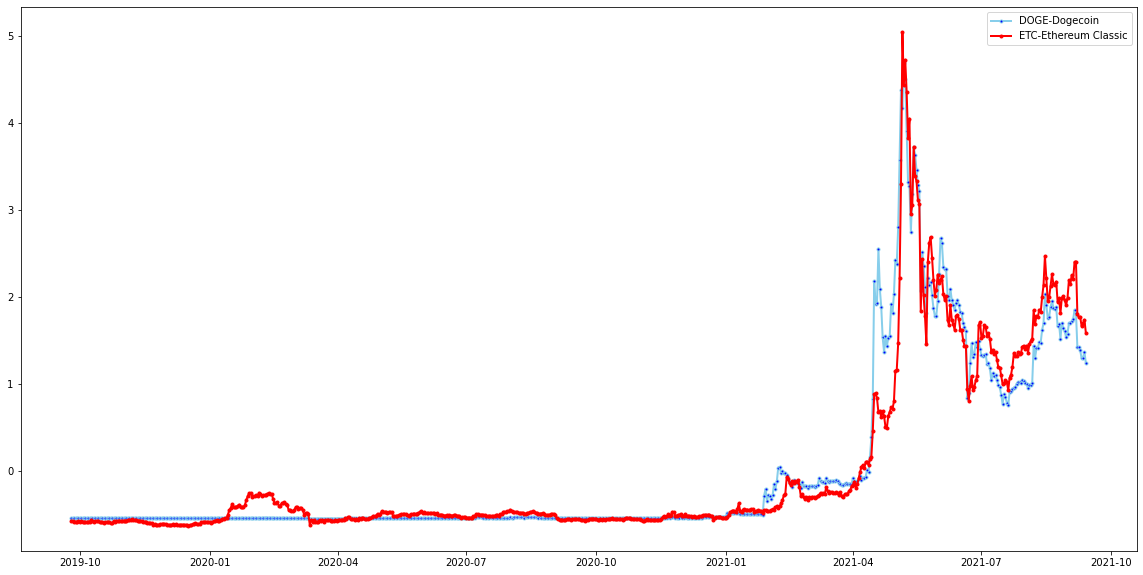

In [31]:

# multiple line plots
plt.rcParams["figure.figsize"] = (20,10)
plt.plot( prices_df_z.index.values, 'DOGE-Dogecoin', data=prices_df_z, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=2)
plt.plot( prices_df_z.index.values, 'ETC-Ethereum Classic', data=prices_df_z, marker='o', markerfacecolor='red', markersize=3, color='red', linewidth=2)
# plt.plot( 'x_values', 'y2_values', data=df_dist, marker='', color='olive', linewidth=2)
# plt.plot( 'x_values', 'y3_values', data=df_dist, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
#plt.xticks(rotation = 45)
# show legend
plt.legend()

# show graph
plt.show()

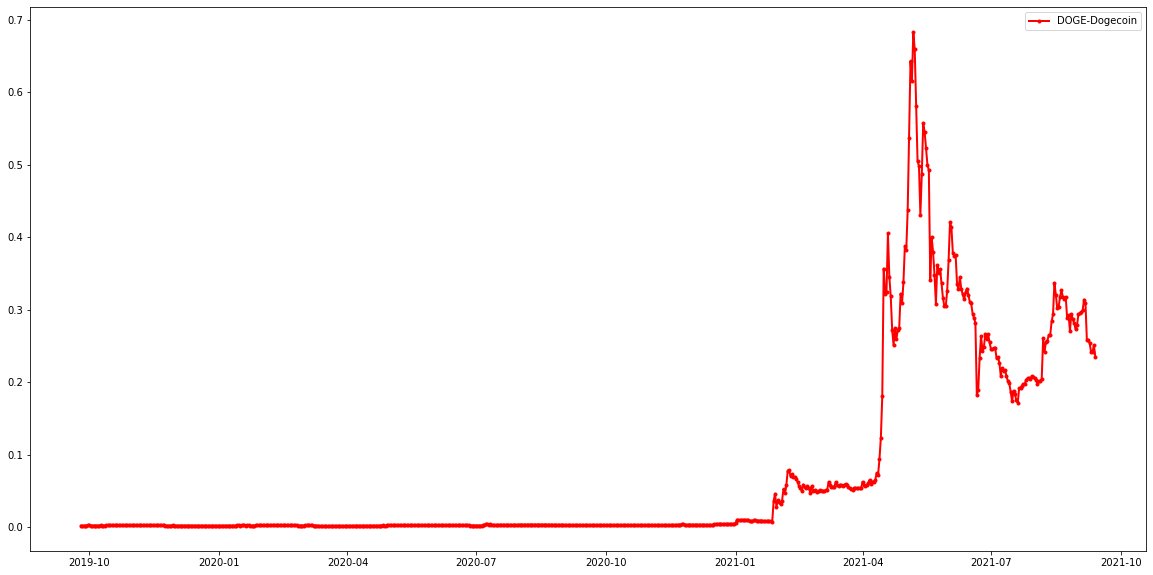

In [32]:
plt.rcParams["figure.figsize"] = (20,10)
# multiple line plots
#plt.plot( prices_df_orig.index.values, 'BTC-Bitcoin', data=prices_df_orig, marker='o', markerfacecolor='blue', markersize=3, color='skyblue', linewidth=2)
plt.plot( prices_df_orig.index.values, 'DOGE-Dogecoin', data=prices_df_orig, marker='o', markerfacecolor='red', markersize=3, color='red', linewidth=2)
#plt.plot( prices_df_orig.index.values, 'ETC-Ethereum Classic', data=prices_df_orig, marker='o', markerfacecolor='blue', markersize=3, color='blue', linewidth=2)
# plt.plot( 'x_values', 'y2_values', data=df_dist, marker='', color='olive', linewidth=2)
# plt.plot( 'x_values', 'y3_values', data=df_dist, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

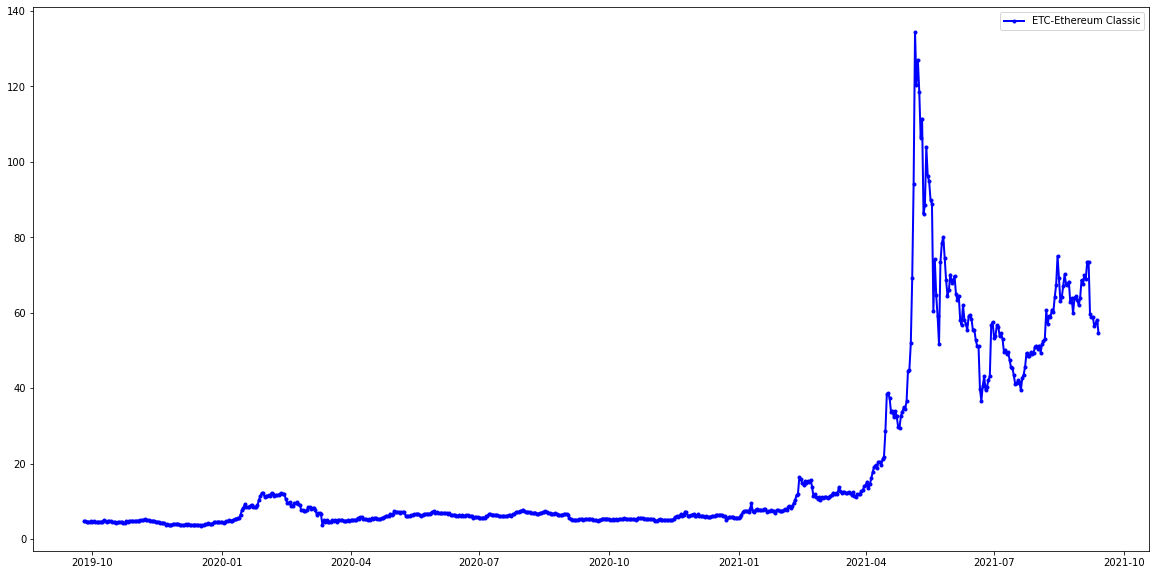

In [33]:
plt.plot( prices_df_orig.index.values, 'ETC-Ethereum Classic', data=prices_df_orig, marker='o', markerfacecolor='blue', markersize=3, color='blue', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=465bb6a2-b771-4fe2-b2d2-aed723f7eb7d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>